In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import ndiffs
import pmdarima as pm
from sklearn.metrics import mean_squared_error

In [78]:
# Train 데이터 불러오기 (00년 ~ 21년)
# 2021년 Train / 2022년 2022Train

data = pd.read_csv('전체.csv', encoding='cp949')
# data = data[38:]

# data = data.drop(['price'], axis = 1)
# data = data.drop(['전체_temp'], axis = 1)
# data = data.drop(['전체_hum'], axis = 1)

data = data.drop(['강원_temp'], axis = 1)
data = data.drop(['경기_temp'], axis = 1)
data = data.drop(['경남_temp'], axis = 1)
data = data.drop(['경북_temp'], axis = 1)
data = data.drop(['광주_temp'], axis = 1)
data = data.drop(['대구_temp'], axis = 1)
data = data.drop(['대전_temp'], axis = 1)
data = data.drop(['부산_temp'], axis = 1)
data = data.drop(['서울_temp'], axis = 1)
data = data.drop(['세종_temp'], axis = 1)
data = data.drop(['울산_temp'], axis = 1)
data = data.drop(['충남_temp'], axis = 1)
data = data.drop(['충북_temp'], axis = 1)
data = data.drop(['전남_temp'], axis = 1)
data = data.drop(['전북_temp'], axis = 1)
data = data.drop(['제주_temp'], axis = 1)
data = data.drop(['인천_temp'], axis = 1)

data = data.drop(['강원_hum'], axis = 1)
data = data.drop(['경기_hum'], axis = 1)
data = data.drop(['경남_hum'], axis = 1)
data = data.drop(['경북_hum'], axis = 1)
data = data.drop(['광주_hum'], axis = 1)
data = data.drop(['대구_hum'], axis = 1)
data = data.drop(['대전_hum'], axis = 1)
data = data.drop(['부산_hum'], axis = 1)
data = data.drop(['서울_hum'], axis = 1)
data = data.drop(['세종_hum'], axis = 1)
data = data.drop(['울산_hum'], axis = 1)
data = data.drop(['충남_hum'], axis = 1)
data = data.drop(['충북_hum'], axis = 1)
data = data.drop(['전남_hum'], axis = 1)
data = data.drop(['전북_hum'], axis = 1)
data = data.drop(['제주_hum'], axis = 1)
data = data.drop(['인천_hum'], axis = 1)
    
data = data.set_index('date')
data = data.fillna(method='ffill')
data.tail()

,price,전체_temp,전체_hum
date,,,
2021-12-27,48002138,-4.032632,59.958947
2021-12-28,38070210,0.408421,69.070526
2021-12-29,52093193,2.966316,66.233684
2021-12-30,47463341,-0.084211,51.426316
2021-12-31,66341333,-3.306316,44.310526


<AxesSubplot:xlabel='date'>

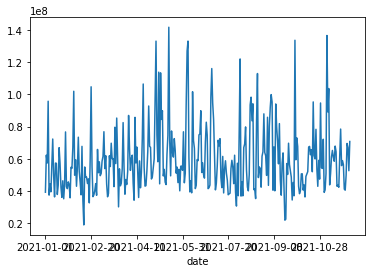

In [79]:
y_train = data['price'][:-31]
y_train.plot()

<AxesSubplot:xlabel='date'>

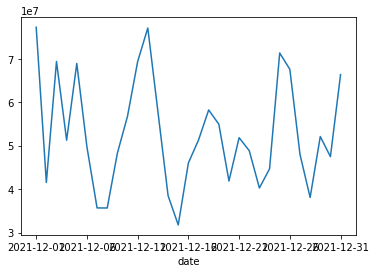

In [80]:
y_test = data['price'][-31:]
y_test.plot()

In [81]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 0


In [82]:
model = pm.auto_arima(y = y_train        # 데이터
                      , d = 0            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 7       
                      , seasonal = True # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=12206.793, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=12165.882, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=12167.133, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=12945.445, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=12178.766, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=12163.658, Time=0.64 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=12155.335, Time=0.96 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=12165.417, Time=0.57 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=12175.540, Time=0.79 sec
 ARIMA(2,0,0)(2,0,1)[7] intercept   : AIC=12157.670, Time=1.24 sec
 ARIMA(1,0,1)(2,0,1)[7] intercept   : AIC=12156.607, Time=1.31 sec
 ARIMA(0,0,1)(2,0,1)[7] intercept   :

In [83]:
model = pm.auto_arima (y_train, d = 0, seasonal = True, trace = True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12206.793, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12178.766, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12181.723, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12945.445, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=12180.520, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=12180.730, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=12182.868, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=12311.204, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.575 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [84]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  334
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -6086.383
Date:                Tue, 02 Aug 2022   AIC                          12178.766
Time:                        15:50:24   BIC                          12190.199
Sample:                             0   HQIC                         12183.324
                                - 334                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.205e+07   2.11e-10   1.99e+17      0.000     4.2e+07     4.2e+07
ar.L1          0.2922      0.016     18.686      0.000       0.262       0.323
sigma2       3.94e+14   6.52e-18   6.04e+31      0.0

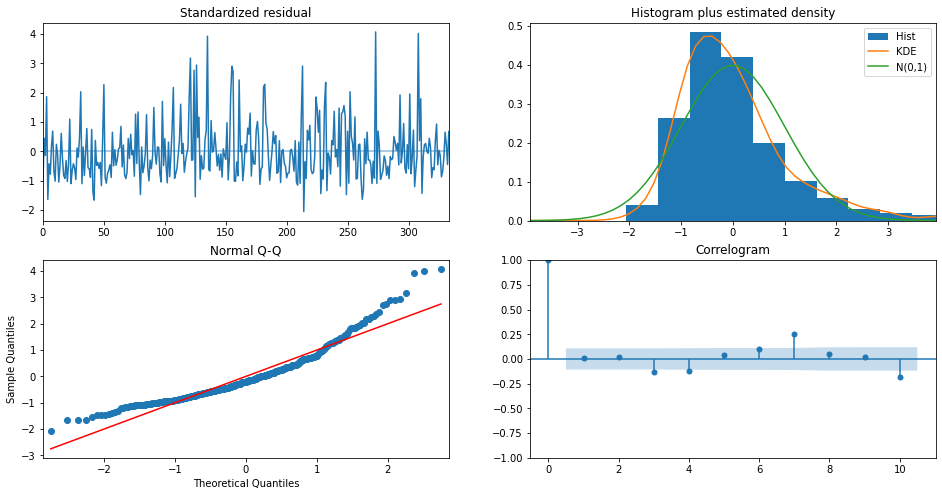

In [85]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

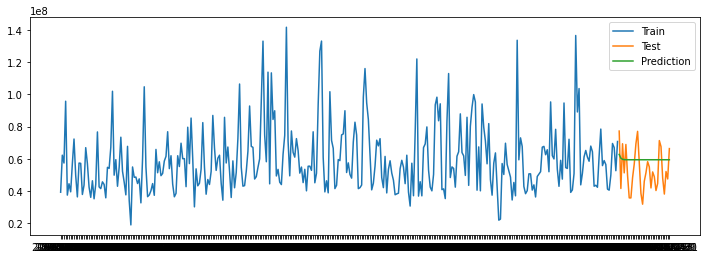

In [86]:
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [87]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [90]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [91]:
df = pd.DataFrame({"test": y_test, "pred": y_pred})
df

,test,pred
date,,
2021-12-01,77227183,6.106922e+07
2021-12-02,41526737,6.424889e+07
2021-12-03,69351467,5.393401e+07
2021-12-04,51247399,6.193048e+07
2021-12-05,68906456,5.671325e+07
2021-12-06,49715939,6.179726e+07
2021-12-07,35673851,5.626786e+07
2021-12-08,35659274,5.222572e+07
2021-12-09,48255147,5.220700e+07


In [92]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  396
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -7198.079
Date:                Tue, 02 Aug 2022   AIC                          14402.158
Time:                        15:51:10   BIC                          14414.102
Sample:                             0   HQIC                         14406.890
                                - 396                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.205e+07   2.09e-10   2.01e+17      0.000     4.2e+07     4.2e+07
ar.L1          0.2820      0.015     18.467      0.000       0.252       0.312
sigma2       3.94e+14   6.51e-18   6.05e+31      0.0

In [93]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(1,0,0)모형")
fig.show()

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, '2021-12-27'),
  Text(0.0, 0, '2021-12-01'),
  Text(5.0, 0, '2021-12-06'),
  Text(10.0, 0, '2021-12-11'),
  Text(15.0, 0, '2021-12-16'),
  Text(20.0, 0, '2021-12-21'),
  Text(25.0, 0, '2021-12-26'),
  Text(30.0, 0, '2021-12-31'),
  Text(35.0, 0, '')])

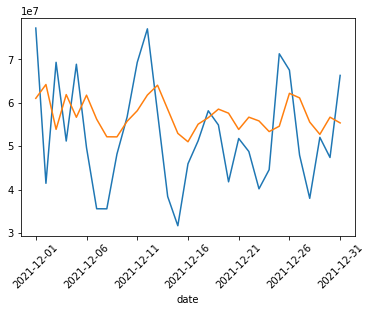

In [94]:
y_test = data['price'][-31:]
y_test.plot()
df['pred'].plot()
plt.xticks(rotation=45)

In [95]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

# 모형(0, 0, 2)

12793075.87840029

In [96]:
from sklearn.metrics import r2_score
import math

r2_score(y_test, round(df['pred'], 0))

-0.03950421126365855